In [49]:
#load datsets
import pandas as pd
import numpy as np
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


In [50]:
#Fix Date & Time Columns
trades['Timestamp_IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')
trades['Date'] = trades['Timestamp_IST'].dt.date
sentiment['Date'] = pd.to_datetime(sentiment['date'])

In [51]:
sentiment['Date'] = sentiment['Date'].dt.date
sentiment.head()

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [52]:
#data cleaning 
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
Timestamp_IST       0
Date                0
dtype: int64

In [53]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
Date              0
dtype: int64

In [ ]:
trades.drop(columns=['Transaction Hash', 'Order ID'], errors='ignore', inplace=True)

In [55]:
trades['is_profitable'] = trades['Closed PnL'] > 0
trades["is_profitable"]

0         False
1         False
2         False
3         False
4         False
          ...  
211219    False
211220    False
211221    False
211222    False
211223    False
Name: is_profitable, Length: 211224, dtype: bool

In [57]:
#marge data with trades and sentiment
merge_data=trades.merge(sentiment[["Date","classification"]],on="Date",how="left")

In [59]:
merge_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Timestamp_IST,Date,is_profitable,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,False,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,False,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,False,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,False,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,False,Extreme Greed


In [ ]:
#who is profitable
merge_data.groupby("classification")["Closed PnL"].mean()

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

In [66]:
merge_data.groupby('classification')['is_profitable'].mean()

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_profitable, dtype: float64

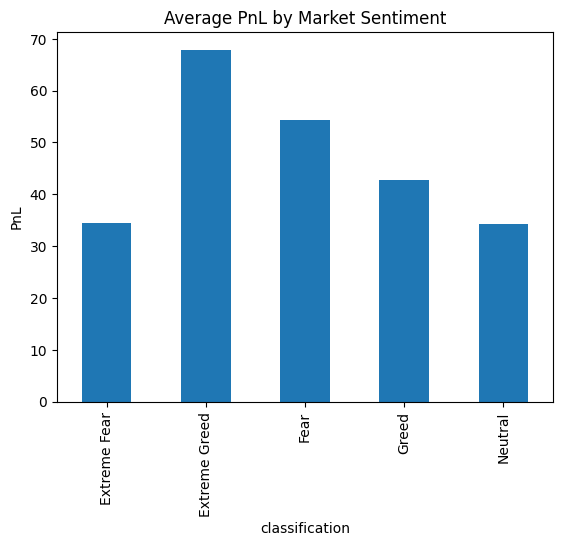

In [ ]:
#profit and loss during sentiment

import matplotlib.pyplot as plt

merge_data.groupby('classification')['Closed PnL'].mean().plot(kind='bar')
plt.title("Average PnL by Market Sentiment")
plt.ylabel("PnL")
plt.show()


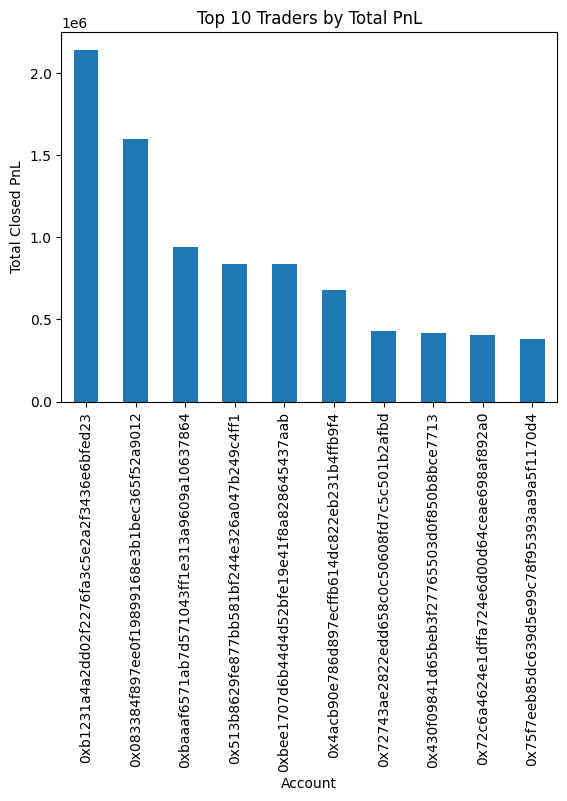

In [ ]:
#top 10 profitable trader

top_traders = (
    merge_data
    .groupby('Account')['Closed PnL']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_traders.plot(kind='bar', title='Top 10 Traders by Total PnL')
plt.ylabel('Total Closed PnL')
plt.show()
